In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#DATASET 
df = pd.read_csv("Heart Disease Prediction dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#SHAPE OF DATASET 
df.shape

(303, 14)

In [4]:
# DESCRIBING DATASET 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# CHECK FOR THE MISSING VALUES
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# DATA INFORMATON 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#CHECKING IF ANY DUPLICATES ARE THERE 
df_dup = df.duplicated().any()
df_dup

True

In [8]:
#REMOVING DUPLICATES 
df = df.drop_duplicates()
df_dup = df.duplicated().any()
df_dup

False

In [9]:
#SIZE 
df.shape

(302, 14)

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
#TARGET DISCRIPTION 
df_target = df.groupby("target").size()
df_target

target
0    138
1    164
dtype: int64

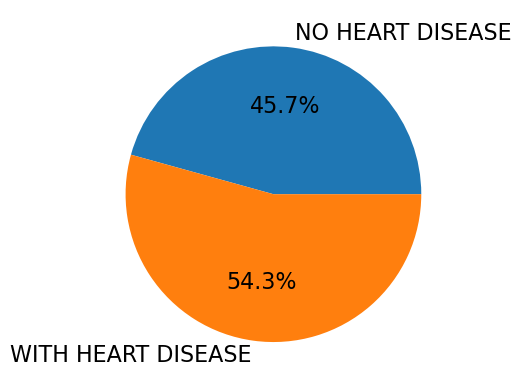

In [12]:
#PLOTTING PIECHART OF TARGET 
plt.pie(df_target.values, labels = ["NO HEART DISEASE ","WITH HEART DISEASE"], autopct='%1.1f%%', radius = 1.0, textprops = {"fontsize" : 16}) 
plt.show()

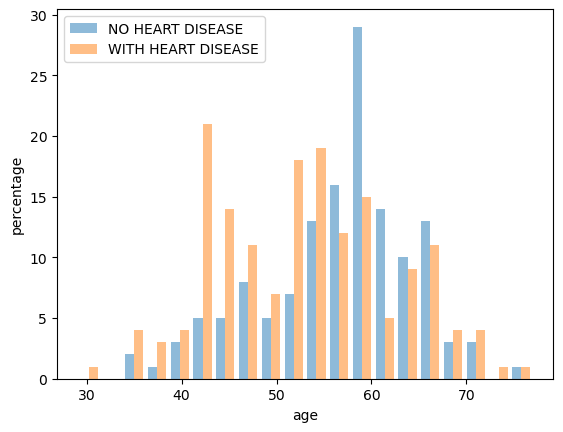

In [13]:
#GRAPHICAL REPRESENTATION OF AGE 
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

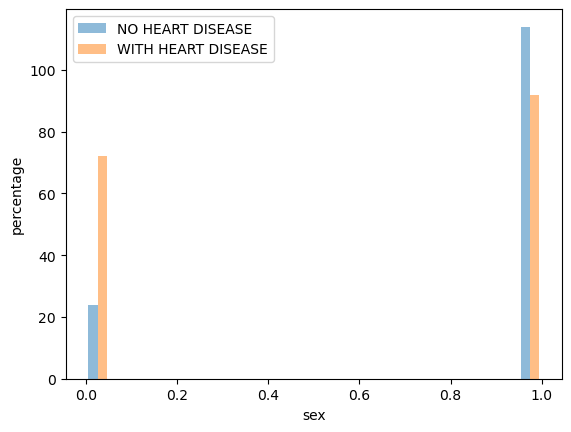

In [14]:
#GRAPHICAL REPRESENTATION OF SEX 
plt.hist([df[df.target==0].sex, df[df.target==1].sex], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("sex")
plt.ylabel("percentage")
plt.legend()
plt.show()

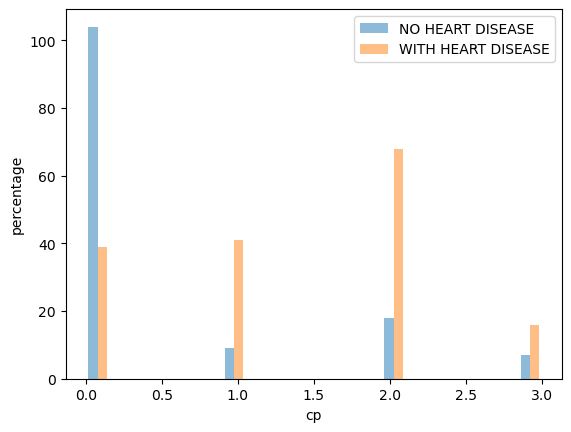

In [15]:
#GRAPHICAL REPRESENTATION OF CP 
plt.hist([df[df.target==0].cp, df[df.target==1].cp], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("cp")
plt.ylabel("percentage")
plt.legend()
plt.show()

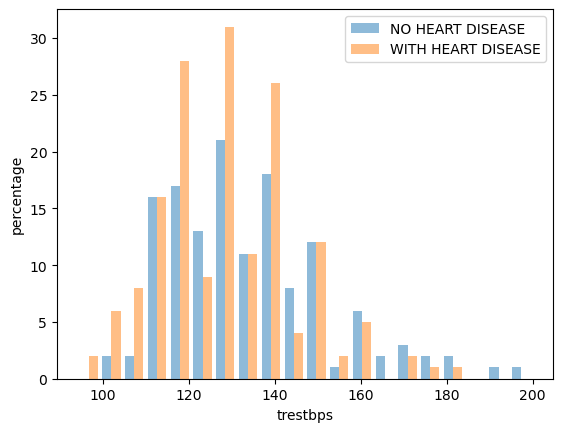

In [16]:
#GRAPHICAL REPRESENTATION OF TRESTBPS 
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

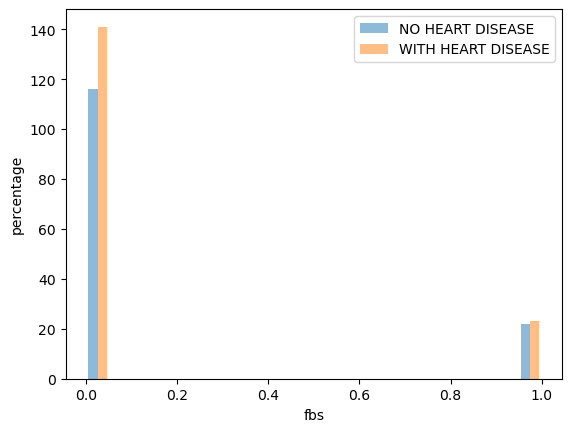

In [17]:
#GRAPHICAL REPRESENTATION OF fbs 
plt.hist([df[df.target==0].fbs, df[df.target==1].fbs], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("fbs")
plt.ylabel("percentage")
plt.legend()
plt.show()

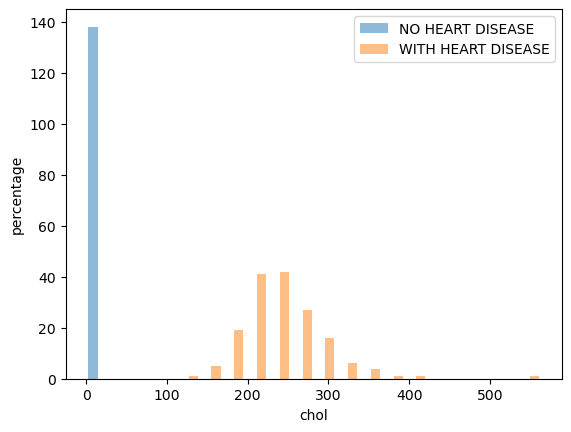

In [18]:
#GRAPHICAL REPRESENTATION OF chol 
plt.hist([df[df.target==0].fbs, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

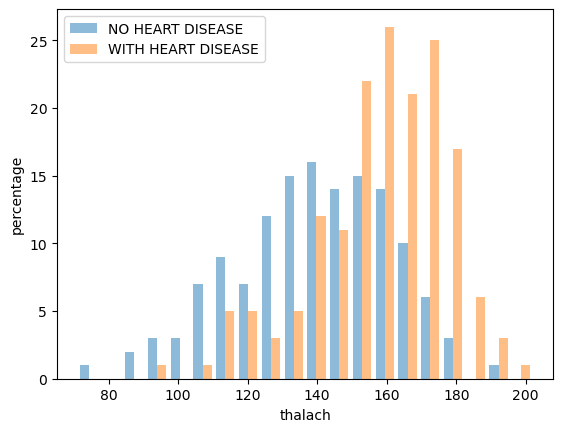

In [19]:
#GRAPHICAL REPRESENTATION OF thalach
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

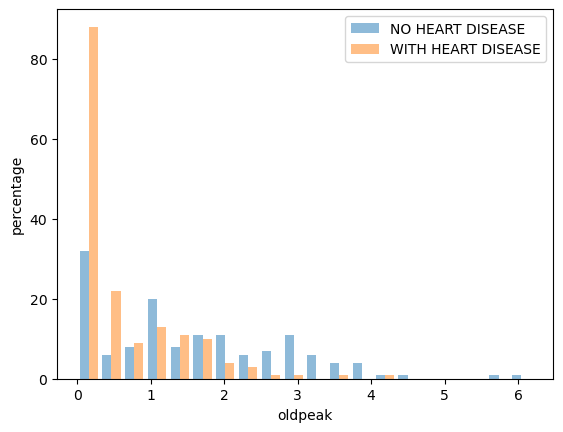

In [20]:
#GRAPHICAL REPRESENTATION OF oldpeak
plt.hist([df[df.target==0].oldpeak, df[df.target==1].oldpeak], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("oldpeak")
plt.ylabel("percentage")
plt.legend()
plt.show()

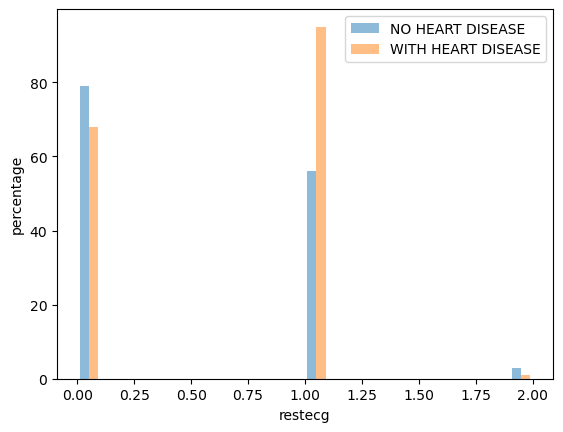

In [21]:
#GRAPHICAL REPRESENTATION OF restecg
plt.hist([df[df.target==0].restecg, df[df.target==1].restecg], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("restecg")
plt.ylabel("percentage")
plt.legend()
plt.show()

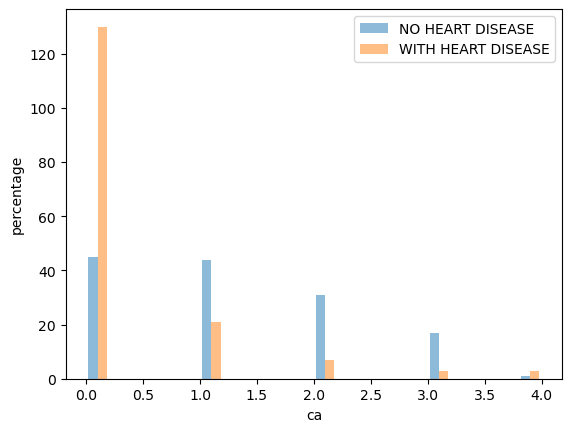

In [22]:
#GRAPHICAL REPRESENTATION OF ca	
plt.hist([df[df.target==0].ca, df[df.target==1].ca], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("ca")
plt.ylabel("percentage")
plt.legend()
plt.show()

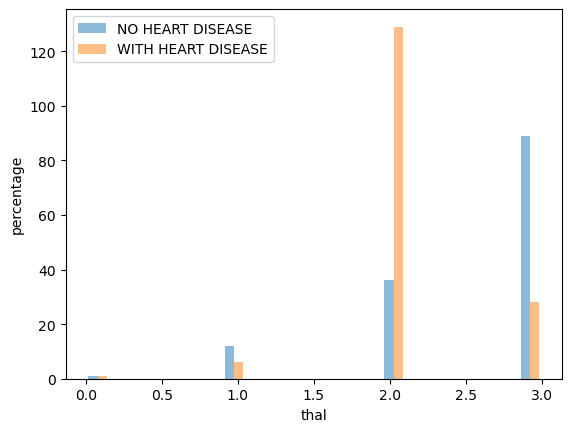

In [23]:
#GRAPHICAL REPRESENTATION OF thal 
plt.hist([df[df.target==0].thal, df[df.target==1].thal], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("thal")
plt.ylabel("percentage")
plt.legend()
plt.show()

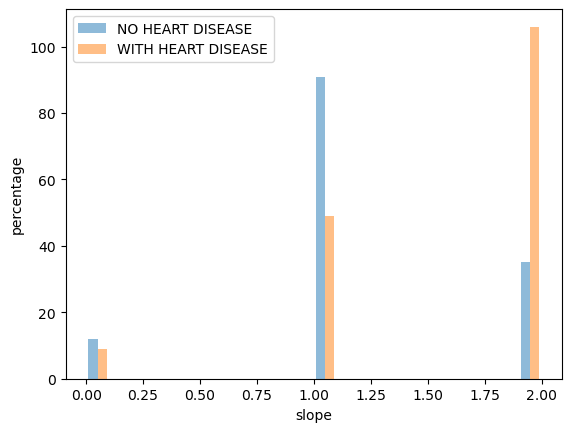

In [24]:
#GRAPHICAL REPRESENTATION OF slope
plt.hist([df[df.target==0].slope, df[df.target==1].slope], bins = 20, alpha = 0.5, label = ["NO HEART DISEASE ","WITH HEART DISEASE"])
plt.xlabel("slope")
plt.ylabel("percentage")
plt.legend()
plt.show()

In [25]:
#CORRELATION MATRIX (feature selection, detecting multicollinearity, and improving model interpretability)
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [26]:
import seaborn as sns

<Axes: >

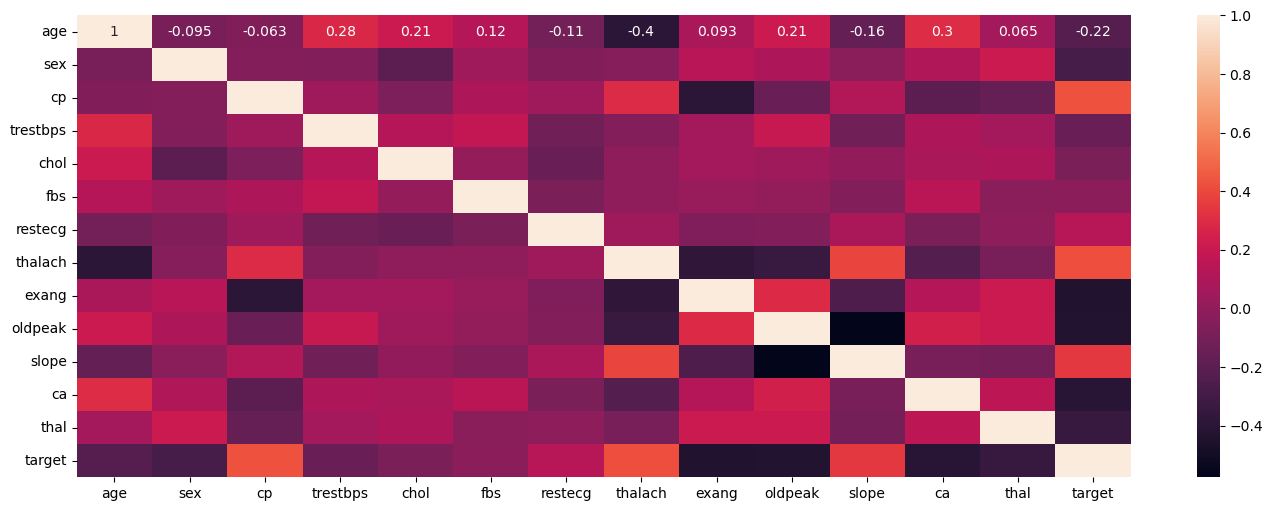

In [27]:
#PLOTTING CORRELATION MATRIX
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

In [28]:
#COUNT OF MALE AND FEMALE IN DATASET
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [29]:
#DATA PROCESSING 
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else: 
        cont_val.append(column)

In [30]:
#ENCODING CATEGORICAL DATA 
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [31]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [32]:
#CHECKING 
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [33]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df,columns=cate_val,drop_first=True)

In [34]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [35]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler

In [36]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [37]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [38]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
X = df.drop('target',axis=1)

In [39]:
y = df['target']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
180,0.064151,1,0.022661,2.061248,-0.768384,0.135360,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True
229,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
111,0.285561,1,1.049221,-2.332210,1.024705,-0.727060,False,True,False,True,...,False,False,True,True,False,False,False,False,False,True
247,1.281911,1,1.619532,-0.009677,-1.293190,-0.899544,True,False,False,False,...,True,True,False,False,False,True,False,True,False,False
60,1.835438,0,-1.232023,0.358057,-0.855851,-0.899544,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0.478910,0.996754,-1.205722,2.722620,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
104,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
300,1.503322,1,0.707035,-1.035462,-0.374779,2.032684,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
194,0.617678,1,0.478910,-1.190298,0.237495,1.687716,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [42]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [43]:
#DECISION TREE CLASSIFIER 
from sklearn import tree

In [44]:
model1 = tree.DecisionTreeClassifier()

In [45]:
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [47]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7868852459016393


In [48]:
y_preds1=model1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds1))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [49]:
y_preds1 = model1.predict(X_test)
print(confusion_matrix(y_test, y_preds1, labels=[1,0]))

[[23  9]
 [ 4 25]]


In [50]:
#CONFUSION MATRIX 
from sklearn.metrics import ConfusionMatrixDisplay

In [51]:
# Assuming y_test and y_preds1 are already defined
y_preds1 = model1.predict(X_test)
cm = confusion_matrix(y_test, y_preds1, labels=[1, 0])

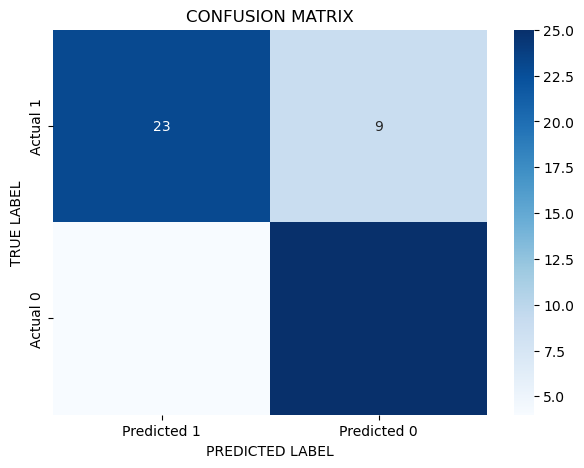

In [52]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 0'], yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('CONFUSION MATRIX')
plt.show()

In [53]:
#SUPPORT VECTOR CLASSIFIER(SVC)
from sklearn.svm import SVC

In [54]:
svc = SVC(C=10)

In [55]:
svc.fit(X_train, y_train)

SVC(C=10)

In [56]:
svc.score(X_test, y_test)

0.8524590163934426

In [57]:
y_pred2=svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [58]:
y_pred2 = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred2, labels=[1,0]))

[[26  6]
 [ 3 26]]


In [59]:
# Assuming y_test and y_pred2 are already defined
y_pred2 = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred2, labels=[1, 0])

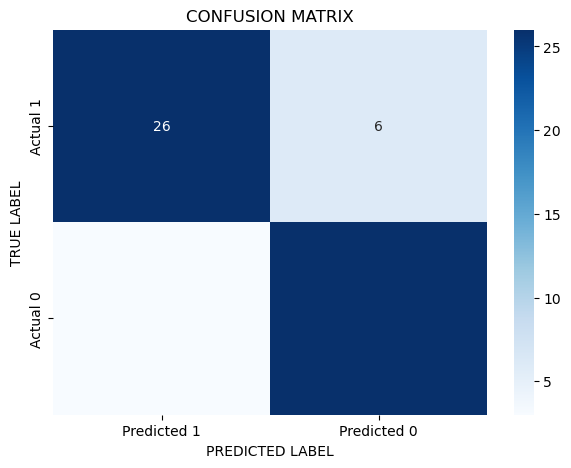

In [60]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 0'], yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('CONFUSION MATRIX')
plt.show()

In [61]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier

In [62]:
rmf = RandomForestClassifier()

In [63]:
rmf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
rmf.score(X_test, y_test)

0.8360655737704918

In [65]:
y_pred=rmf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [66]:
y_preds3 = rmf.predict(X_test)
print(confusion_matrix(y_test, y_preds3, labels=[1,0]))

[[26  6]
 [ 4 25]]


In [67]:
# Assuming y_test and y_preds3 are already defined
y_preds3 = rmf.predict(X_test)
cm = confusion_matrix(y_test, y_preds3, labels=[1, 0])

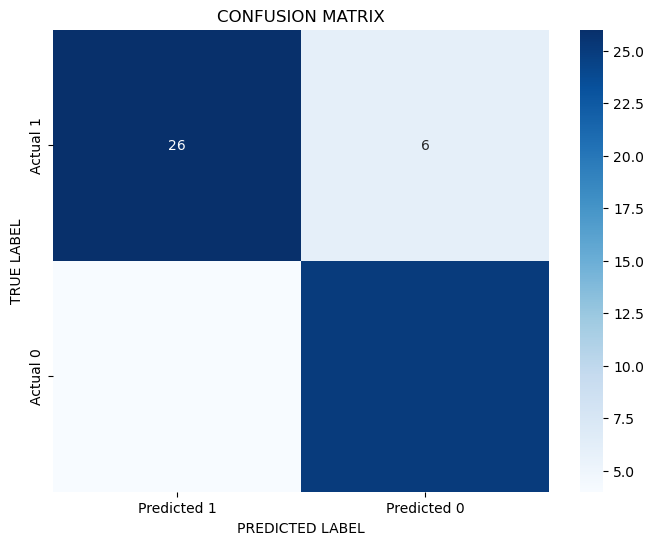

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 0'], yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('CONFUSION MATRIX')
plt.show()

In [69]:
#LOGISTIC REGRESSION
model = LogisticRegression()

In [70]:
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
#TRAINING THE MODEL 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [72]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8713692946058091


In [73]:
#TESTING THE MODEL 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [74]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9016393442622951


In [75]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [76]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [77]:
y_preds4 = X_test_prediction

In [78]:
print(confusion_matrix(y_test, y_preds4, labels=[1,0]))

[[28  4]
 [ 2 27]]


In [79]:
# Assuming y_test and y_preds4 are already defined
y_preds4 = model.predict(X_test)
cm = confusion_matrix(y_test, y_preds4, labels=[1, 0])

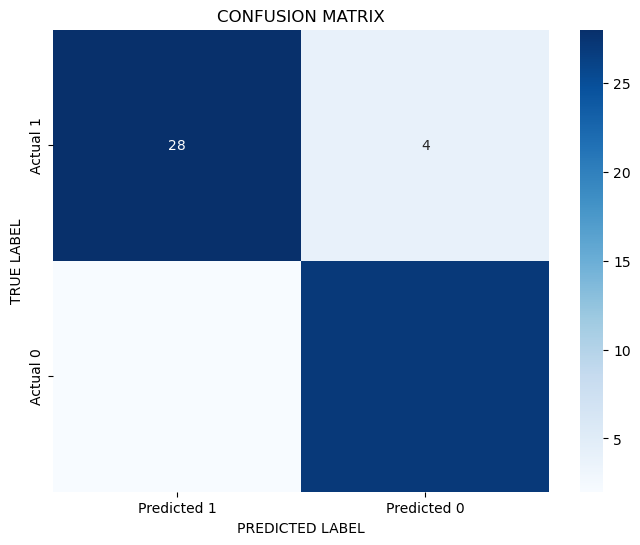

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 0'], yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('CONFUSION MATRIX')
plt.show()

In [81]:
#COMPARISON BETWEEN ACCURACY SCORE 
final_data = pd.DataFrame({'Models':['DT','SVC','RF','LR'],
                         'ACC' : [accuracy_score(y_test,y_preds1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_preds3),
                                 accuracy_score(y_test,y_preds4)]})

In [82]:
final_data

,Models,ACC
0,DT,0.786885
1,SVC,0.852459
2,RF,0.836066
3,LR,0.901639


<Axes: xlabel='Models', ylabel='ACC'>

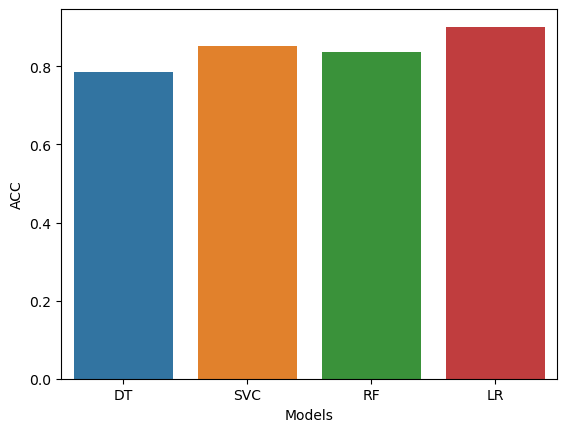

In [99]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [106]:
X = df.drop('target',axis=1)
y = df['target']

In [107]:
X.shape

(302, 13)

In [108]:
from sklearn.linear_model import LogisticRegression

In [117]:
# Logistic Regression model with increased iterations
model = LogisticRegression(max_iter=2000)
model.fit(X, y)

LogisticRegression(max_iter=2000)

In [118]:
#PREDICTION ON NEW DATA
import pandas as pd

In [120]:
new_data = pd.DataFrame({
    'age' : 63,
    'sex' : 1,
    'cp' : 3,
    'trestbps' : 145,
    'chol' :233,
     'fbs':1,
     'restecg' :0,
     'thalach' :150,
     'exang' :0,
     'oldpeak' :2.3,
     'slope' :0,
     'ca' :0,
    'thal':1,
},index=[1])

In [121]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [131]:
p = model.predict(new_data)
if p[0]==0:
    print("NO HEART DISEASE")
    print("PERSON IS HEALTHY")
else:
    print("WITH HEART DISEASE")
    print("PERSON IS SICK")

WITH HEART DISEASE
PERSON IS SICK


In [128]:
#taking another example to verify our result 
new_data1 = pd.DataFrame({
    'age' :68 ,
    'sex' : 1,
    'cp' : 0,
    'trestbps' : 144,
    'chol' :194,
     'fbs':1,
     'restecg' :1,
     'thalach' :141,
     'exang' :0,
     'oldpeak' :3.4,
     'slope' :1,
     'ca' :2,
    'thal':3,
},index=[0])

In [125]:
new_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,68,1,0,144,194,1,1,141,0,3.4,1,2,3


In [132]:
p = model.predict(new_data1)
if p[0]==0:
    print("NO HEART DISEASE")
    print("PERSON IS HEALTHY")
else:
    print("WITH HEART DISEASE")
    print("PERSON IS SICK")

NO HEART DISEASE
PERSON IS HEALTHY
